In [1]:
#Is naive bayes a parametric or non-parametric? depends if we are assuming any distribution of the data or not

In [2]:
#objective of this lab
# load and explore the dataset using Pandas, focusing on detecing duplicates and missing values
# clean the dataset by removing duplicates and handling issing features values


# Task 1: Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [4]:
!pip install ucimlrepo

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

# data (as pandas dataframes)
X = secondary_mushroom.data.features
y = secondary_mushroom.data.targets

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)


{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'published_in': 'Scientific Reports', 'year': 2021, 'url': 'https://www.semanticscholar.org/

In [6]:
import pandas as pd
df = pd.DataFrame(X.to_numpy(), columns=X.columns)
df['class'] = y
df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,...,y,w,u,w,t,g,NaN,d,w,p
1,16.6,x,g,o,f,e,NaN,w,17.99,18.19,...,y,w,u,w,t,g,NaN,d,u,p
2,14.07,x,g,o,f,e,NaN,w,17.8,17.74,...,y,w,u,w,t,g,NaN,d,w,p
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,...,y,w,u,w,t,p,NaN,d,w,p
4,14.64,x,h,o,f,e,NaN,w,16.53,17.2,...,y,w,u,w,t,p,NaN,d,w,p


In [8]:
df['class'].unique()  # different classes present in the dataset

array(['p', 'e'], dtype=object)

In [9]:
# get the unique class labels with their corresponding counts
counts = df['class'].value_counts()
print(counts)

class
p    33888
e    27181
Name: count, dtype: int64


# Task 2: Removing Duplicates and Imputing Data

In [10]:
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

Number of duplicates: 146


In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9855
gill-spacing            25062
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51536
stem-surface            38122
stem-color                  0
veil-type               57746
veil-color              53510
has-ring                    0
ring-type                2471
spore-print-color       54597
habitat                     0
season                      0
class                       0
dtype: int64


In [13]:
df['cap-surface'].fillna(df['cap-surface'].mode()[0], inplace=True)
df['cap-surface'].isna().sum()

<ipython-input-13-158a99b141c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cap-surface'].fillna(df['cap-surface'].mode()[0], inplace=True)


0

In [14]:
# filling NA values with mode
for column in df.columns:
  df[column].fillna(df[column].mode()[0], inplace=True)

<ipython-input-14-fc44823e5acf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(df[column].mode()[0], inplace=True)


In [15]:
# checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
class                   0
dtype: int64


# Task 3: Preprocessing Data

In [16]:
from sklearn.preprocessing import LabelEncoder
# label encoder for converting categorical data to integers
lencoder = LabelEncoder()
for column in df.columns:
  if(column == 'stem-width' or column == 'stem-height' or column == 'cap-diameter'):
    continue
  df[column] = lencoder.fit_transform(df[column])
df.head()

<ipython-input-16-f0b0b71b11e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = lencoder.fit_transform(df[column])
<ipython-input-16-f0b0b71b11e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = lencoder.fit_transform(df[column])
<ipython-input-16-f0b0b71b11e9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,15.26,6,2,6,0,2,0,10,16.95,17.09,...,7,11,0,4,1,2,1,0,3,1
1,16.6,6,2,6,0,2,0,10,17.99,18.19,...,7,11,0,4,1,2,1,0,2,1
2,14.07,6,2,6,0,2,0,10,17.8,17.74,...,7,11,0,4,1,2,1,0,3,1
3,14.17,2,3,1,0,2,0,10,15.77,15.98,...,7,11,0,4,1,5,1,0,3,1
4,14.64,6,3,6,0,2,0,10,16.53,17.2,...,7,11,0,4,1,5,1,0,3,1


In [17]:
from sklearn.preprocessing import StandardScaler
# applying standard scaler to all continuous columns
st = StandardScaler()
df['cap-diameter'] = st.fit_transform(df[['cap-diameter']])
df['stem-height'] = st.fit_transform(df[['stem-height']])
df['stem-width'] = st.fit_transform(df[['stem-width']])
df.head()

<ipython-input-17-c88be498d337>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cap-diameter'] = st.fit_transform(df[['cap-diameter']])
<ipython-input-17-c88be498d337>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stem-height'] = st.fit_transform(df[['stem-height']])
<ipython-input-17-c88be498d337>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,1.616820,6,2,6,0,2,0,10,3.082356,0.489669,...,7,11,0,4,1,2,1,0,3,1
1,1.871167,6,2,6,0,2,0,10,3.391996,0.599337,...,7,11,0,4,1,2,1,0,2,1
2,1.390945,6,2,6,0,2,0,10,3.335427,0.554473,...,7,11,0,4,1,2,1,0,3,1
3,1.409926,2,3,1,0,2,0,10,2.731032,0.379004,...,7,11,0,4,1,5,1,0,3,1
4,1.499137,6,3,6,0,2,0,10,2.957308,0.500636,...,7,11,0,4,1,5,1,0,3,1


plotting the class counts

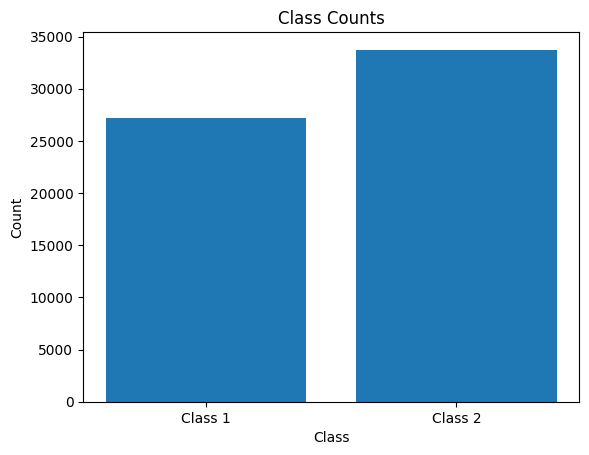

In [18]:
import matplotlib.pyplot as plt

# class counts for plotting class imbalance
class1 = df['class'].value_counts()[0]
class2 = df['class'].value_counts()[1]

plt.bar(['Class 1', 'Class 2'], [class1, class2])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts')
plt.show()

In [19]:
y = df['class'].astype(int)
x = df.drop('class', axis=1)

# feature scaling is not required as we only need the frequencies of feature values not the acutal values

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
x_train = x_train.to_numpy()
print(x_train.shape)
x_test = x_test.to_numpy()
print(x_test.shape)
y_train = y_train.to_numpy()
print(y_train.shape)
y_test = y_test.to_numpy()
print(y_test.shape)

(48738, 20)
(12185, 20)
(48738,)
(12185,)


# Task 4: Implement Naive Bayes

In [22]:
!pip install tqdm
from tqdm import tqdm

In [23]:
import numpy as np
import pandas as pd

# Calculate priors
priors = y.value_counts(normalize=True).to_dict()

# Separate continuous and categorical features
continuous_features = ['cap-diameter', 'stem-height', 'stem-width']
categorical_features = x.columns.difference(continuous_features).tolist()

# Calculate means and variances for continuous features
means = {}
means['cap-diameter'] = df['cap-diameter'].mean()
means['stem-height'] = df['stem-height'].mean()
means['stem-width'] = df['stem-width'].mean()
stds = {}
stds['cap-diameter'] = df['cap-diameter'].std()
stds['stem-height'] = df['stem-height'].std()
stds['stem-width'] = df['stem-width'].std()


# Calculate category probabilities for categorical features
category_probs = {}
for feature in categorical_features:
  # class counts are normalized to give probability values
    category_probs[feature] = df[feature].value_counts(normalize=True)


# Function to calculate Gaussian PDF
def gaussian_pdf(x, mean, std):
    return (1 / np.sqrt(2 * np.pi * (std**2))) * np.exp(-((x - mean) ** 2) / (2 * (std**2)))

# Predict function
def predict(X_new):

    # final predictions are stored here
    results = []

    # we iterate over all the rows of the x_test
    for i in range(len(X_new)):
        posteriors = {}  # dictionary to store posterior probabilities
        for cls in priors:
            prior = np.log(priors[cls])  # Log prior
            likelihood = 0
            for feature in continuous_features:
              # for feature (col) we calculate the likelihood of that given x[i]
              inx = x.columns.get_loc(feature)
              likelihood += np.log(gaussian_pdf(X_new[i][inx], means[feature], stds[feature]))
              #print(likelihood)
            for feature in categorical_features:
              inx = x.columns.get_loc(feature)
              if(X_new[i][inx] == 0):
                continue
              likelihood += np.log(category_probs[feature].get(X_new[i][inx]))  # Small number to avoid log(0)
            # adding log of prior and likelihood ignoring the denominator
            posteriors[cls] = prior + likelihood
        # print(posteriors, posteriors.get)
        results.append(max(posteriors, key=posteriors.get))
    return results

# predict is called on x_test
predictions = predict(x_test)



In [ ]:
# calculating accuracy by matching classes with y_test
acc = 0
for i in range(len(predictions)):
  if(predictions[i] == y_test[i]):
    acc += 1
acc = acc / len(predictions)
print(acc)


0.5597045547804678


# Task 5: Performance Analysis

In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# confusion matrix
print(confusion_matrix(y_test, predictions))

#classification report
print(classification_report(y_test, predictions))

#accuracy score
print(accuracy_score(y_test, predictions))


[[   0 5365]
 [   0 6820]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5365
           1       0.56      1.00      0.72      6820

    accuracy                           0.56     12185
   macro avg       0.28      0.50      0.36     12185
weighted avg       0.31      0.56      0.40     12185

0.5597045547804678


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


area under auc curve :  0.7798522773902339


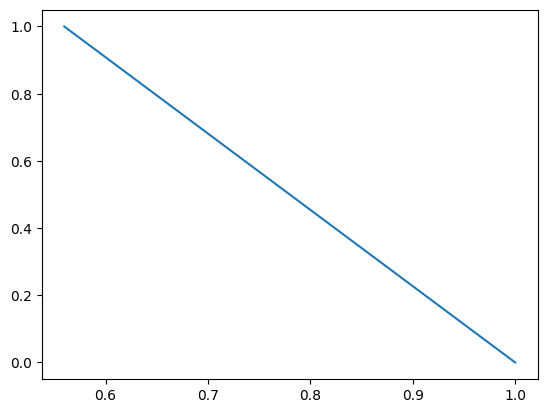

In [32]:
#plotting area under precision recall curve
import seaborn as sns
from sklearn.metrics import auc, precision_recall_curve

# precision, recall and threshold metrics are calculated
precision,recall,threshold = precision_recall_curve(y_test,predictions)
auc_pr = auc(recall,precision)
print("area under auc curve : ",auc_pr)
plt.plot(precision,recall)

# Task 6: Naive Bayes using MixedNB

In [33]:
!pip install mixed-naive-bayes

In [40]:
from mixed_naive_bayes import MixedNB

# getting indices of categorical columns
categorical_index = [x.columns.get_loc(col) for col in x.columns.difference(continuous_features)]

# feeding MixedNB with those indices
model = MixedNB(categorical_features=categorical_index)
if isinstance(x_train, pd.DataFrame):   # for converting to np array
    x_train = x_train.to_numpy()
if isinstance(x_test, pd.DataFrame):
    x_test = x_test.to_numpy()

# model is fit on training data
model.fit(x_train,y_train)

# predictions are store in y_predict_mnb
y_predict_mnb = model.predict(x_test)
print(accuracy_score(y_test,y_predict_mnb))

0.7455067706196142


In [41]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict_mnb))
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_predict_mnb))
print(classification_report(y_test,y_predict_mnb))

0.7455067706196142
[[3328 2037]
 [1064 5756]]
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      5365
           1       0.74      0.84      0.79      6820

    accuracy                           0.75     12185
   macro avg       0.75      0.73      0.73     12185
weighted avg       0.75      0.75      0.74     12185



area under auc curve :  0.8349601601398621


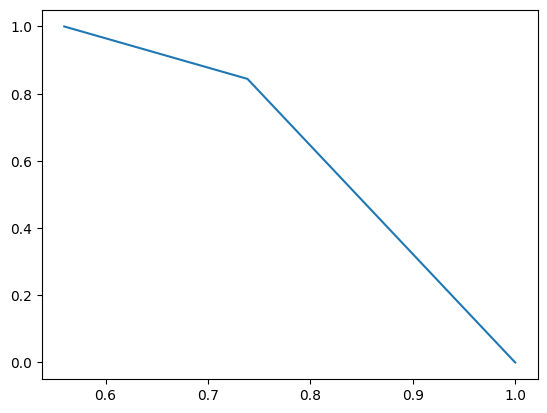

In [42]:
#plotting area under precision recall curve
import seaborn as sns
from sklearn.metrics import auc, precision_recall_curve

precision,recall,threshold = precision_recall_curve(y_test,y_predict_mnb)
auc_pr = auc(recall,precision)
print("area under auc curve : ",auc_pr)
plt.plot(precision,recall)